In [ ]:
library(data.table)
library(forecastML)
library(tidyverse)
library(lubridate)
library(weathermetrics)
library(caret)
options(repr.plot.width=15)
options(repr.plot.height=8)

In [2]:
data_ <- fread('~/hakmar/hakmar_data_last_ver.txt')

## 2017 ve 2018 yılları verileri ile doğrusal model eğitilmesi

In [5]:
train <- data_ %>% filter(yil==2017 | yil==2018)
test <- data_  %>% filter(yil==2019)
test_x <- test %>% select(-toplam_miktar)
test_y <- test %>% select(toplam_miktar)
model2 <- lm(formula = 'toplam_miktar ~.',data = train)

In [ ]:
tahmin2 <- predict(model2,test_x)

`summarise()` has grouped output by 'hafta'. You can override using the `.groups` argument.



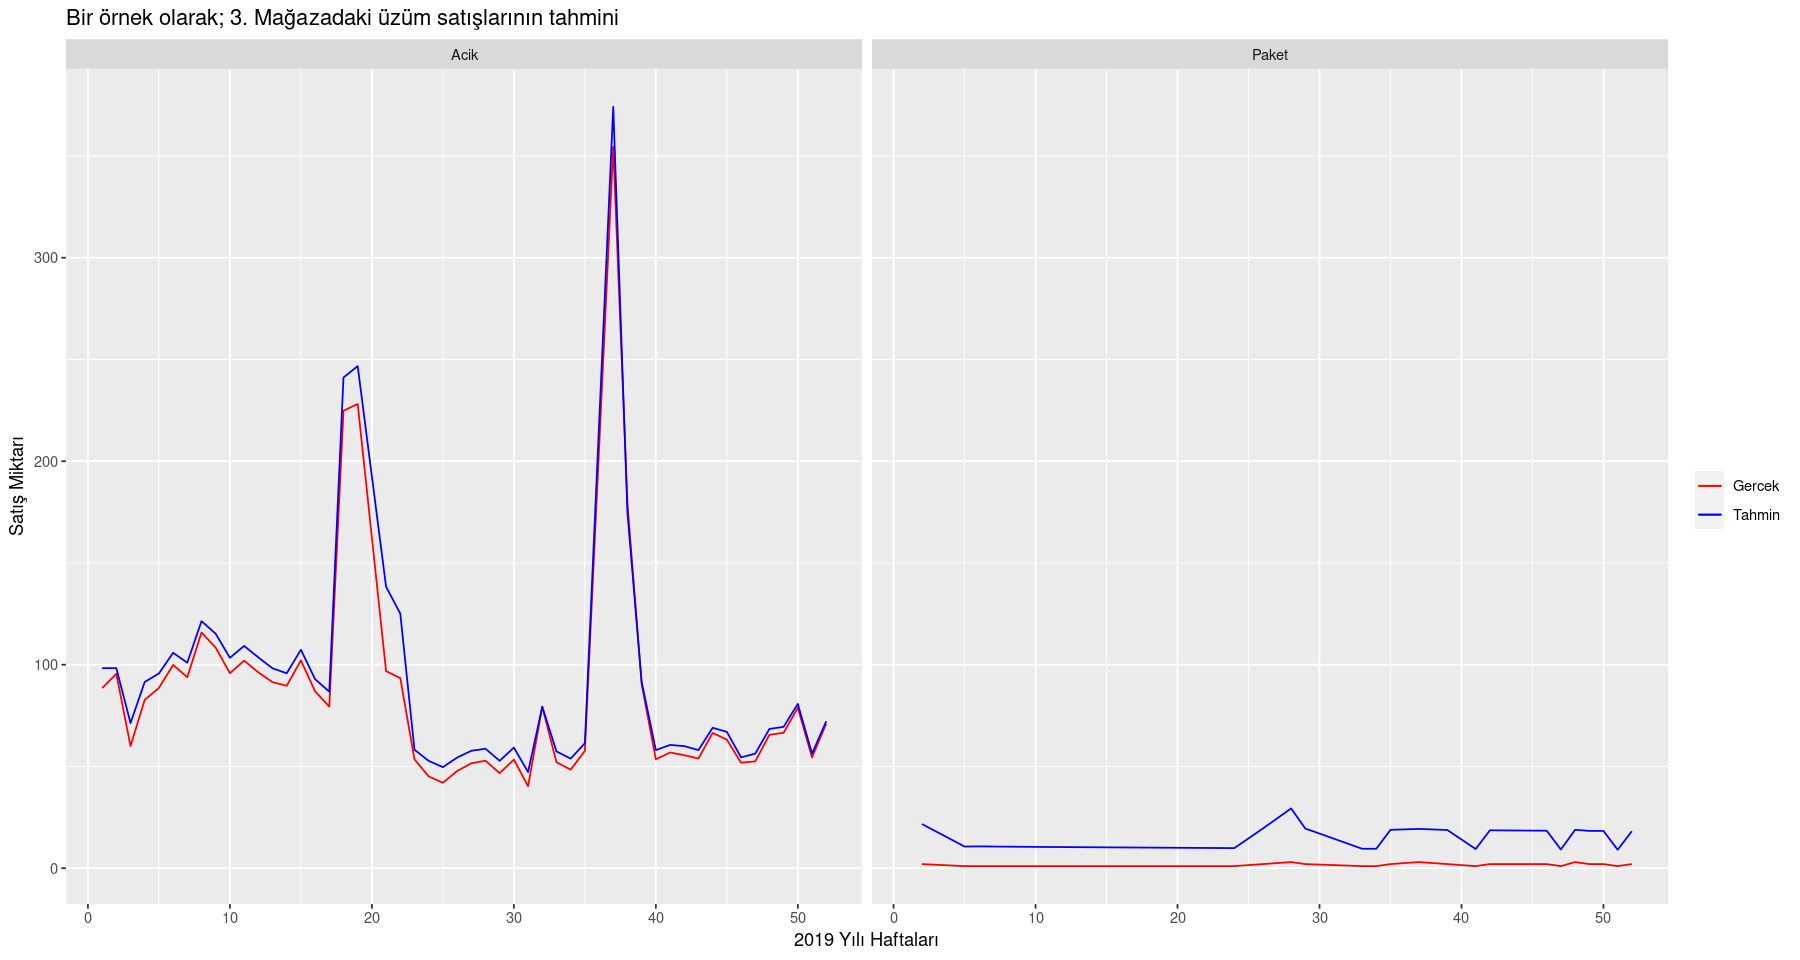

In [7]:
test_x %>%
cbind(test_y,tahmin2) %>%
filter(magaza_no.3==1,kategoriUzum==1) %>% 
select(hafta,toplam_miktar,tahmin2,turPaket) %>%
mutate(tur=ifelse(turPaket==0,'Acik','Paket')) %>% 
group_by(hafta,tur) %>% 
summarise(gercek_satis=sum(toplam_miktar),tahmin_satis=sum(tahmin2)) %>% 
filter(tahmin_satis>0) %>% 
ggplot(aes(x=hafta))+
geom_line(aes(y=gercek_satis,color='Gercek'))+
geom_line(aes(y=tahmin_satis,color='Tahmin'))+
scale_colour_manual(name='',values=c(Gercek="red", Tahmin="blue"))+
facet_wrap(~tur)+
ylab('Satış Miktarı')+
xlab('2019 Yılı Haftaları')+
ggtitle('Bir örnek olarak; 3. Mağazadaki üzüm satışlarının tahmini')

In [17]:
model %>% summary


Call:
lm(formula = "toplam_ciro ~.", data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2967.6   -52.0   -11.7    39.7 11763.5 

Coefficients: (6 not defined because of singularities)
                               Estimate   Std. Error t value
(Intercept)                -47439.77732    923.66570 -51.360
magaza_no.2                     6.10484      1.64908   3.702
magaza_no.3                    27.39104      1.63227  16.781
magaza_no.4                    10.16426      1.62273   6.264
magaza_no.5                     5.51952      1.68932   3.267
magaza_no.6                    44.07686      1.61499  27.292
magaza_no.7                    50.01827      1.59573  31.345
magaza_no.8                    36.55303      1.60105  22.831
magaza_no.9                    -0.10655      1.68222  -0.063
magaza_no.10                   16.11843      1.63060   9.885
magaza_no.11                   -9.35287      1.67428  -5.586
magaza_no.12                   45.84227      1.61270  28.426
magaz

In [10]:
test_x <- test %>% select(-toplam_ciro)
test_y <- test %>% select(toplam_ciro)
model <- lm(formula = 'toplam_ciro ~.',data = train)

In [13]:
model


Call:
lm(formula = "toplam_ciro ~.", data = train)

Coefficients:
               (Intercept)                 magaza_no.2  
               -47439.7773                      6.1048  
               magaza_no.3                 magaza_no.4  
                   27.3910                     10.1643  
               magaza_no.5                 magaza_no.6  
                    5.5195                     44.0769  
               magaza_no.7                 magaza_no.8  
                   50.0183                     36.5530  
               magaza_no.9                magaza_no.10  
                   -0.1065                     16.1184  
              magaza_no.11                magaza_no.12  
                   -9.3529                     45.8423  
              magaza_no.13                magaza_no.14  
                   60.9137                     41.8569  
              magaza_no.15                magaza_no.17  
                   24.1415                     48.0280  
              magaza_

In [ ]:
tahmin <- predict(model,test_x)

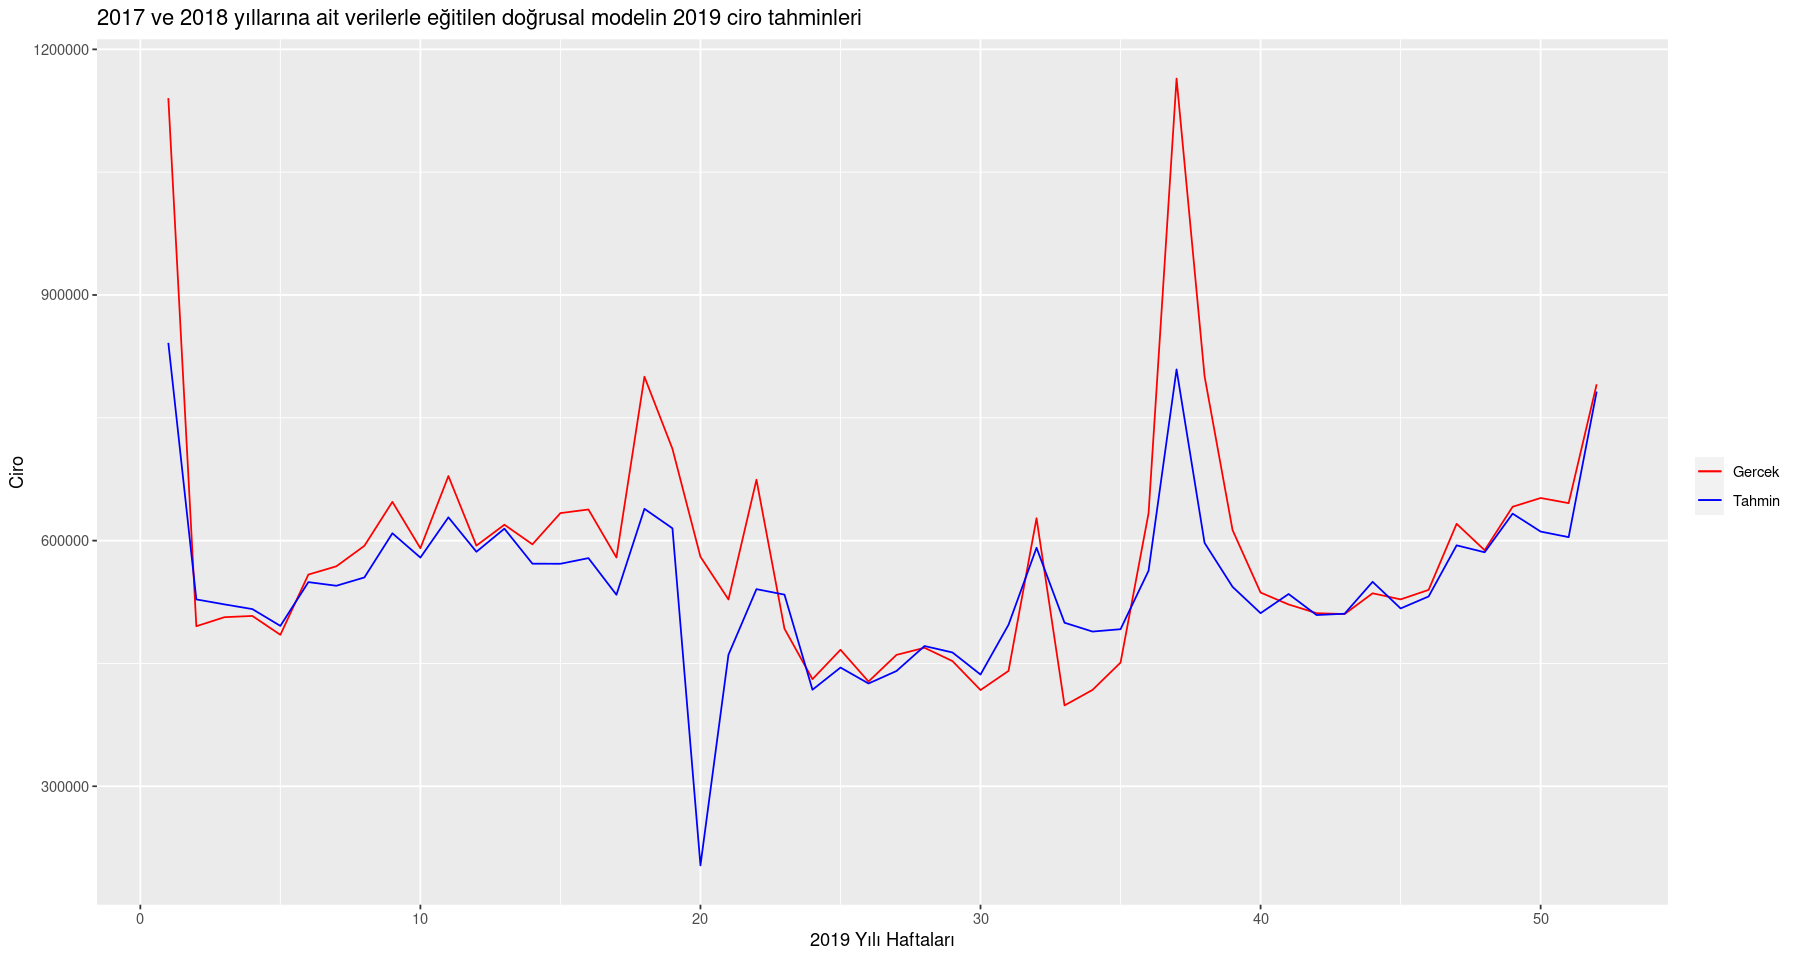

In [15]:
test_x %>%
select(hafta) %>%
cbind(test_y,tahmin) %>%
group_by(hafta) %>% 
summarise(haftalik_toplam_ciro=sum(toplam_ciro),haftalik_tahmini_ciro=sum(tahmin,na.rm = T)) %>% 
ggplot(aes(x=hafta))+
geom_line(aes(y=haftalik_toplam_ciro,color='Gercek'))+
geom_line(aes(y=haftalik_tahmini_ciro,color='Tahmin'))+
scale_colour_manual(name='',values=c(Gercek="red", Tahmin="blue"))+
ylab('Ciro')+
xlab('2019 Yılı Haftaları')+
ggtitle('2017 ve 2018 yıllarına ait verilerle eğitilen doğrusal modelin 2019 ciro tahminleri')